### Meteoric Water Lines

In [1]:
#colors
mcw = 'mediumseagreen'
bcw = 'slateblue'
rain = 'tomato' #MC only
warm = 'darkorange' #MC only 
snow = 'steelblue'
cold = 'lightsteelblue'
BC_snow = 'teal'
BC_rain = 'peru'

In [2]:
import os
import pandas as pd
from pandas.core.groupby import groupby
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as si
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
from scipy.stats import linregress
import matplotlib.patches as mpatches
import scipy as sp
import scipy
from datetime import datetime, timedelta
from matplotlib.patches import Rectangle
import matplotlib.dates as mdates
from itertools import combinations
import researchpy as rp
from matplotlib.colors import to_rgba

### Mores Creek

In [3]:
#processed isotopes MCW
df = pd.read_csv('MCW_Processed_Iso_NOV23.csv',parse_dates = [2], infer_datetime_format = True)

In [4]:
#Seperate column for type of sample collection, rain v snow v stream (MC v BC)
df['Type'] = df.Site_ID.str[:2]
#Seperate site nomber 1 - 10
df['Site_no'] = df.Site_ID.str[3:5]
df['Site_no'] = df['Site_no'].apply(pd.to_numeric)
#Seperate rain vs snow to their own columns
df['Rain'] = df.Type.equals('RC')
df['Snow'] = df.Type.equals('IB')

In [5]:
# Set precip values to only rain or snow, not stream samples
df['D_18O_Precip'] = np.where((df['Type'] == 'RC')|
                               (df['Type'] == 'IB'), df['D_18O'], np.nan)

df['D_2H_Precip'] = np.where((df['Type'] == 'RC') |
                               (df['Type'] == 'IB'), df['D_2H'], np.nan)

### Treasure Valley

In [6]:
#local isotope dataset from 2013
dd = pd.read_csv('DCEW_Danny_Isotopes.csv',parse_dates = [1], infer_datetime_format = True)

dd.rename(columns={'Site_ID': 'Type'}, inplace=True)
dd.head()

,Type,Collection_Date,D_2H_Precip,D_18O_Precip
0,Lower Deer Point,2009-11-13,-150.39,-19.06
1,Lower Deer Point,2010-01-13,-84.22,-11.37
2,Lower Deer Point,2010-01-20,-131.73,-15.63
3,Lower Deer Point,2010-01-20,-136.24,-17.27
4,Lower Deer Point,2010-03-29,-118.34,-15.84


### Global and Local Meteoric Water Lines

In [7]:
# δ2H = 7.40 * δ18O – 2.176  local meteoric water line BOise, ID
# δ2H = 8 * δ18O + 10 GMWL
m_global = 8 
b_global = 10
x_global = np.linspace(-6,-25) # constructs a numpy array of [0.0, 1.0, ... 10.0]

m_local = 7.4
b_local = -2.176

### Dry Creek MWL

In [8]:
dc = pd.read_csv('DCEW_updated_7aug23.csv',parse_dates = [2], infer_datetime_format = True)
dc.tail(2)

,Sample_Name,Site_ID,Collection_Date,D_2H,D_2H_StDev,D_18O,D_18O_StDev
134,1605,DC-C2E-1605,2023-05-25,-122.904922,0.483,-16.237666,0.120
135,1608,DC-C2M-1608,2023-05-25,-123.575051,1.730,-16.449515,0.352


In [9]:
#remove ID numbers from site names
dc['Site_no'] = dc.Site_ID.str[3:6]
dc['Type'] = 'DC'
dc.head()

#take out -
dc = dc.replace(['LR-'],'LR')
dc = dc.replace(['MR-'],'MR')
dc = dc.replace(['UR-'],'UR')
dc = dc.replace(['LG-'],'LG')
dc['Site_no'].unique()

array(['C1E', 'LR', 'MR', 'UR', 'LG', 'C2E', 'C2M', 'C1W'], dtype=object)

(-130.0, -110.0)

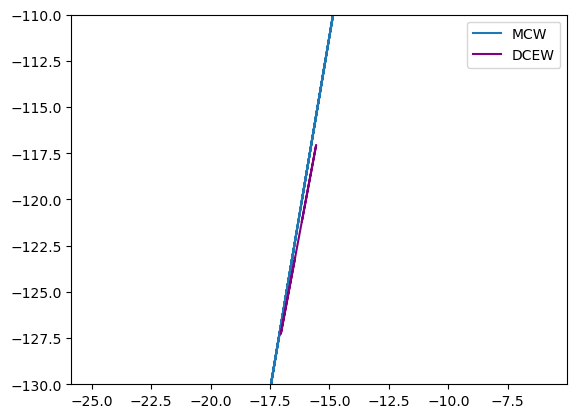

In [10]:
# Mores Creek D_O18 Values 
x = df['D_18O_Precip']
y = df['D_2H_Precip']

#obtain m (slope) and b(intercept) of linear regression line
#m, b = np.polyfit(x, y, 1)

idx = np.isfinite(x) & np.isfinite(y)
m, b = np.polyfit(x[idx], y[idx], 1)

plt.plot(x, m*x+b, label='MCW')

# Dry Creek D_18O values & regression line 
x_dc = dc['D_18O']
y_dc = dc['D_2H']
c,d = np.polyfit(x_dc, y_dc, 1)
plt.plot(x_dc, c*x_dc+d, linestyle='solid', color ='purple', label='DCEW')
plt.legend()

#zoom up on dry creek
plt.ylim(-130, -110)

MC LinregressResult(slope=7.6604946982391695, intercept=3.741922975039401, rvalue=0.9943885800734976, pvalue=3.3712397367671415e-150, stderr=0.0661028476168636, intercept_stderr=1.062496968865452)
r_squared_MCW = 0.9888086481805868


Text(0.5, 1.0, 'updated')

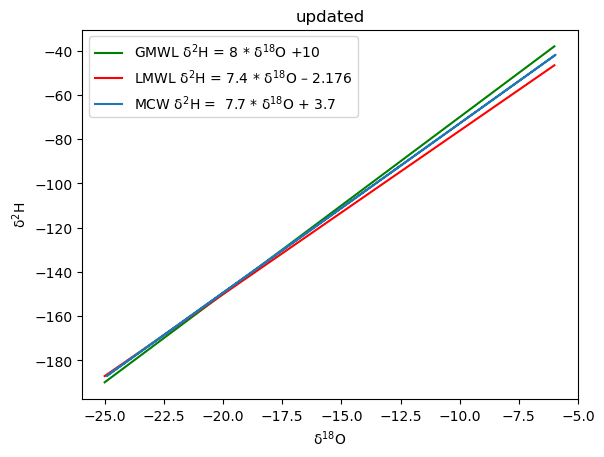

In [11]:
#GMWL & LMWL 
# order of operation
plt.plot(x_global, m_global * x_global + b_global, linestyle='solid', color="g",
         label='GMWL $\mathregular{δ^{2}}$H = 8 * $\mathregular{δ^{18}}$O +10')
plt.plot(x_global, m_local * x_global + b_local, linestyle='solid', color='r',
         label='LMWL $\mathregular{δ^{2}}$H = 7.4 * $\mathregular{δ^{18}}$O – 2.176')

# Mores Creek D_O18 Values 
x = df['D_18O_Precip']
y = df['D_2H_Precip']
#plt.scatter(x,y,s=10,color='gray')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x[idx], y[idx], 1)

#add linear regression line to scatterplot
plt.plot(x[idx], m*x[idx]+b, label='MCW $\mathregular{δ^{2}}$H =  7.7 * $\mathregular{δ^{18}}$O + 3.7')

plt.ylabel('$\mathregular{δ^{2}}$H')
plt.xlabel('$\mathregular{δ^{18}}$O')
plt.legend()
# Dry Creek D_18O values & regression line 
#x_dc = dc['D_18O']
#y_dc = dc['D_2H']
#m, b = np.polyfit(x_dc, y_dc, 1)
#c, d = np.polyfit(x_dc, y_dc, 1)
#plt.plot(x_dc, c*x_dc+d, linestyle='solid', color ='purple', linewidth=2.0, label='R2 DCEW = ')

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x_dc, y_dc)
slope, intercept, r_mcw, p_value, std_err = scipy.stats.linregress(x[idx], y[idx])

print('MC',linregress(x[idx],y[idx]))
#print('DC',linregress(x_dc,y_dc))

r_squared_MCW = r_mcw ** 2
print('r_squared_MCW =', r_squared_MCW)

plt.title('updated')
#take all stream data and dry creek only show mores creek preicp - clarify only precip data 
#add in equations for all of them 
#take out stream data
#do I need R2 or p value in the legend to or just the equation?

#### Local MWL Points vs MCW Points 

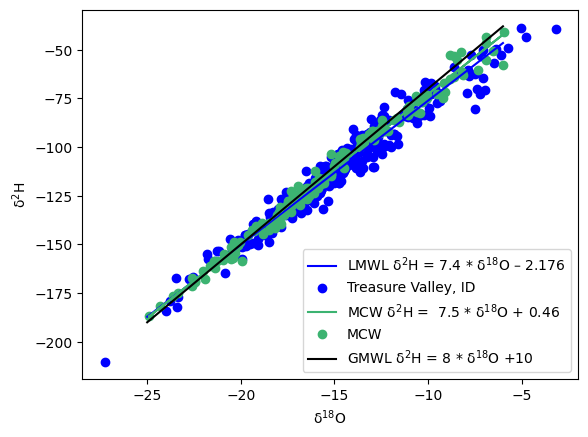

In [12]:
#Treasure valley poinst from 2013 combined with Mores Creek from 2022-2023
plt.plot(x_global, m_local * x_global + b_local, linestyle='solid', color='blue',
         label='LMWL $\mathregular{δ^{2}}$H = 7.4 * $\mathregular{δ^{18}}$O – 2.176')

plt.scatter(dd['D_18O_Precip'],dd['D_2H_Precip'], label='Treasure Valley, ID', color='blue')

#add linear regression line to scatterplot
plt.plot(x[idx], m*x[idx]+b, color=mcw, label='MCW $\mathregular{δ^{2}}$H =  7.5 * $\mathregular{δ^{18}}$O + 0.46')

plt.scatter(df['D_18O'], df['D_2H'], label='MCW', color=mcw)
#sns.scatterplot(x="D_18O", y="D_2H", data=dd)

#adding GMWL
plt.plot(x_global, m_global * x_global + b_global, linestyle='solid', color="black",
         label='GMWL $\mathregular{δ^{2}}$H = 8 * $\mathregular{δ^{18}}$O +10')

plt.ylabel('$\mathregular{δ^{2}}$H')
plt.xlabel('$\mathregular{δ^{18}}$O')
plt.legend()

### Distribution Plot D18O

In [13]:
TV = pd.concat([df, dd]).sort_index()
TV['D_18O_Precip'].dropna(inplace=True)

TV['Type'].unique()

array(['BC', 'Lower Deer Point', 'MC', 'RC', 'IB', 'Lower Weather',
       'Mountain View HS', 'Taft Elementary', 'Treeline',
       'Washington Elementary'], dtype=object)

In [14]:
def Site (row):
   if row['Type'] == 'MC' :
      return 'MCW'
   if row['Type'] == 'BC' :
      return 'MCW'
   if row['Type'] == 'IB' :
      return 'MCW'
   if row['Type'] == 'RC' :
      return 'MCW'
   if row['Type'] == 'Lower Deer Point' :
      return 'TV'
   if row['Type'] == 'Lower Weather' :
      return 'TV'
   if row['Type'] == 'Mountain View HS' :
      return 'TV'
   if row['Type'] == 'Taft Elementary' :
      return 'TV'
   if row['Type'] == 'Treeline' :
      return 'TV'
   if row['Type'] == 'Washington Elementary' :
      return 'TV'


TV['Site'] = TV.apply (lambda row: Site(row), axis=1)

In [45]:
TVMC = pd.read_csv('MCW_Practice_File.csv',parse_dates = [1], infer_datetime_format = True)
# this file does not have stream samples.....?

def Site_ID (row):
   if row['Site_ID'] == 'MC' :
      return 'MCW'
   if row['Site_ID'] == 'BC' :
      return 'MCW'
   if row['Site_ID'] == 'IB' :
      return 'MCW'
   if row['Site_ID'] == 'RC' :
      return 'MCW'
   if row['Site_ID'] == 'Lower Deer Point' :
      return 'TV'
   if row['Site_ID'] == 'Lower Weather' :
      return 'TV'
   if row['Site_ID'] == 'Mountain View HS' :
      return 'TV'
   if row['Site_ID'] == 'Taft Elementary' :
      return 'TV'
   if row['Site_ID'] == 'Treeline' :
      return 'TV'
   if row['Site_ID'] == 'Washington Elementary' :
      return 'TV'


TVMC['Type'] = TVMC.apply (lambda row: Site_ID(row), axis=1)
TVMC.head(2)

,Site_ID,Collection_Date,D_2H,D_18O,Unnamed: 4,Unnamed: 5,Type
0,RC,2022-10-27,-92.796701,-12.540525,NaN,NaN,MCW
1,RC,2022-10-27,-95.549245,-13.497653,NaN,NaN,MCW


r_value = 0.9698433533505579
TV+MC LinregressResult(slope=7.388881538442984, intercept=-1.422616314862978, rvalue=0.9848062516812929, pvalue=0.0, stderr=0.06003561681981066, intercept_stderr=0.9257484001390026)


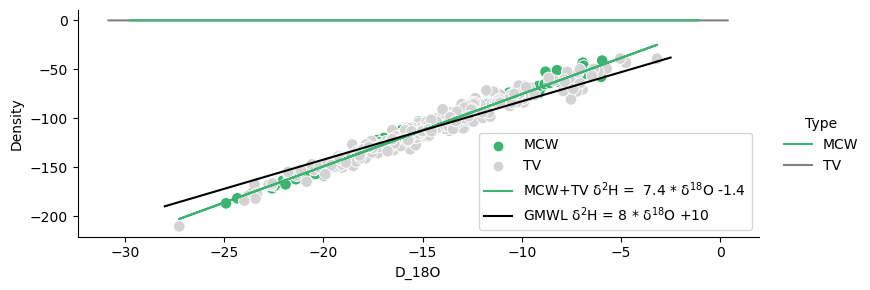

In [58]:
#Plot Treasure Valley D18O Distribution
#distplot count of TVMC
sns. displot(TVMC, x='D_18O', hue='Type', kind='kde', palette=[mcw, 'gray'],height=3,aspect=2.6)

sns.scatterplot(x='D_18O', y='D_2H', data=TVMC, hue='Type',
                palette=[mcw, 'lightgray'], markers=['o', 'x'], s=70)

x1= TVMC['D_18O']
y1 = TVMC['D_2H']

#idx = np.isfinite(x) & np.isfinite(y)
#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x1, y1, 1)

#add MCW + TV linear regression line to scatterplot
plt.plot(x1, m*x1+b, label='MCW+TV $\mathregular{δ^{2}}$H =  7.4 * $\mathregular{δ^{18}}$O -1.4', color=mcw)

#adding GMWL
xx_global = np.linspace(-2.5,-28)
plt.plot(xx_global, m_global * x_global + b_global, linestyle='solid', color="black",
         label='GMWL $\mathregular{δ^{2}}$H = 8 * $\mathregular{δ^{18}}$O +10')


slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x1, y1)

print('r_value =',r_value**2)

plt.legend()
print('TV+MC',linregress(x1,y1))


# do another displot for fraction of streamflow (x = D018, y = count)color code warm(red) and blue(cold) 

C:\Users\grena\anaconda3\lib\site-packages\seaborn\utils.py:122: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scout = method(scout_x, scout_y, **kws)
C:\Users\grena\anaconda3\lib\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)
C:\Users\grena\anaconda3\lib\site-packages\seaborn\distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try kdeplot.
  warnings.warn(msg, UserWarning)


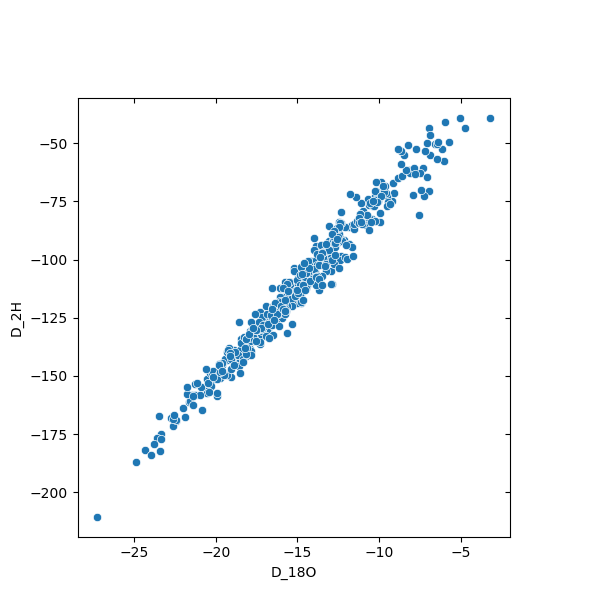

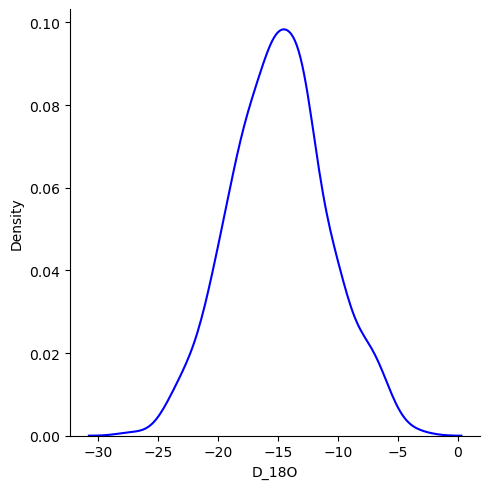

In [17]:
g=sns.JointGrid(x=x1, y=y1, data=TVMC, space=0)

g = g.plot_joint(sns.scatterplot, cmap="Blues_d")
sns.displot(TVMC["D_18O"], color="b", kind='kde', ax=g.ax_marg_x)

#shorten the y axis on dis plot and use inkscape to add it to the top of x margin